<a href="https://colab.research.google.com/github/shraddha-18/Astropy-tutorials/blob/main/Astropy_Day2_data_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install astropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 26.8 MB/s 
     |████████████████████████████████| 832 kB 35.2 MB/s 
     |████████████████████████████████| 48 kB 5.7 MB/s 
     |████████████████████████████████| 4.0 MB 44.2 MB/s 


In [ ]:
import astropy 
import numpy as np
import matplotlib.pyplot as plt
import scipy
from astropy.modeling import models, fitting
from astroquery.vizier import Vizier
import scipy.optimize

1) Fit a Linear model: Three steps to fit data using astropy.modeling
We are going to start with a linear fit to real data. The data comes from the paper Bhardwaj et al. 2017. This is a catalog of Type II Cepheids, which is a type of variable stars that pulsate with a period between 1 and 50 days. In this part of the tutorial, we are going to measure the Cepheids Period-Luminosity relation using astropy.modeling. This relation states that if a star has a longer period, the luminosity we measure is higher.

To get it, we are going to import it from Vizier using astroquery

In [ ]:
catalog = Vizier.get_catalogs('J/A+A/605/A100')

In [ ]:
type(catalog)

astroquery.utils.commons.TableList

In [ ]:
print(catalog)

TableList with 1 tables:
	'0:J/A+A/605/A100/table1' with 16 column(s) and 50 row(s) 


This catalog has a lot of information, but for this tutorial we are going to work only with periods and magnitudes. Let's grab them using the keywords 'Period' and __Ksmag__. Note that 'e__Ksmag_' refers to the error bars in the magnitude measurements.

In [ ]:
period = np.array(catalog[0]['Period'])

In [ ]:
print(period)

[ 2.268  1.484  2.008  1.183  1.896  1.517  1.239  1.279  1.098  1.62
  1.66  14.891 40.228 10.142 11.383  1.498  1.171 16.305  7.034 22.453
  1.931 15.198  2.755  1.663  1.089 19.31  14.8    4.796  1.523  1.398
  1.209 12.341  1.284  7.075 21.081  1.051 12.637  1.332  1.119  1.035
 10.54   1.742 31.559  2.936 15.746  1.551  2.31   1.39   1.34  16.715]


In [ ]:

period.shape

(50,)

In [ ]:
log_period = np.log10(period)
k_mag = np.array(catalog[0]['__Ksmag_'])
k_mag_err = np.array(catalog[0]['e__Ksmag_'])

Text(0, 0.5, 'ks')

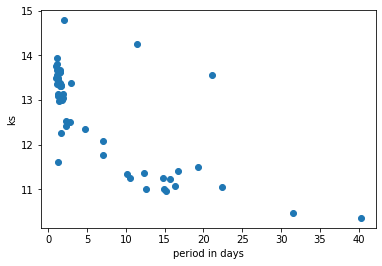

In [ ]:
plt.scatter(period, k_mag)
plt.xlabel("period in days")
plt.ylabel("ks")

Text(0, 0.5, 'Ks')

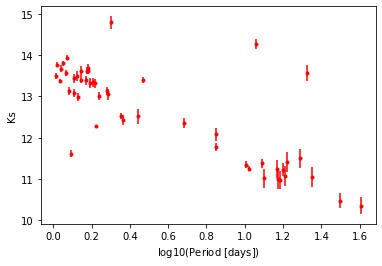

In [ ]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt = 'r.')
plt.xlabel(r'$\log{10}$(Period [days])')
plt.ylabel('Ks')  # Ks band
#Photometric magnitude in infrared between 2 and 3 micron

One could say that there is a linear relationship between log period and magnitudes. To probe it, we want to make a fit to the data. This is where astropy.modeling is useful. We are going to understand how in three simple lines we can make any fit we want. We are going to start with the linear fit, but first, let's understand what a model and a fitter are.

Models in Astropy are known parametrized functions. With this format they are easy to define and to use, given that we do not need to write the function expression every time we want to use a model, just the name. They can be linear or non-linear in the variables.

First we need to choose which model we are going to use to fit to our data. As we said before, our data looks like a linear relation, so we are going to use a linear model.

In [ ]:
model = models.Linear1D()


Fitters in Astropy are the classes resposable for making the fit. They can be linear or non-linear in the parameters (no the variable, like models).

In [ ]:
fitter = fitting.LinearLSQFitter()

Second we are going to choose the fitter we want to use. This choice is basically which method we want to use to fit the model to the data. In this case we are going to use the Linear Least Square Fitting. 

In [ ]:
best_fit = fitter(model, log_period, k_mag, weights = 1.0/k_mag_err*2)

In [ ]:
print(best_fit)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope            intercept     
    ------------------- ------------------
    -1.8388029755798254 13.517530405305104


Text(0, 0.5, 'Ks')

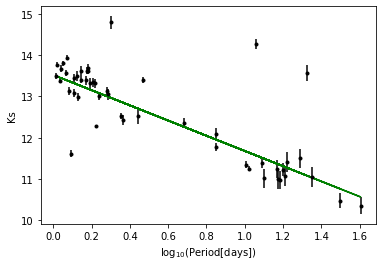

In [ ]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt = "k.")
plt.plot(log_period, best_fit(log_period), color ="g")
plt.xlabel(r'$\log_{10}$(Period[days])')
plt.ylabel('Ks')